### <font color='blue'> Objective: </font>


#### To build a decision tree regressor on garment worker productivity dataset and to understand features impacting productivity of workers 


#### <font color='blue'> Dataset Description:  </font>
#### This dataset includes important attributes of the garment manufacturing process and the productivity of the employees which had been collected manually and also been validated by the industry experts.




In [106]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

In [2]:
import numpy as np
import pandas as pd
import random
import warnings
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_percentage_error
from math import sqrt
import warnings

# Exploratory Data Analysis

In [4]:
# Step 1: Read the dataset and basic dataframe exploration
df = pd.read_csv('garments_worker_productivity.csv')

In [5]:
df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [6]:
# there are a mix of categorical and numeric columns
# label column is actual productivity



In [7]:
df.shape

(1197, 15)

In [8]:
# there are 1197 observations and 15 features

In [9]:
df.dtypes

date                      object
quarter                   object
department                object
day                       object
team                       int64
targeted_productivity    float64
smv                      float64
wip                      float64
over_time                  int64
incentive                  int64
idle_time                float64
idle_men                   int64
no_of_style_change         int64
no_of_workers            float64
actual_productivity      float64
dtype: object

In [10]:
# some columns require encoding as they are categorical

In [11]:
print(df.columns)

Index(['date', 'quarter', 'department', 'day', 'team', 'targeted_productivity',
       'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men',
       'no_of_style_change', 'no_of_workers', 'actual_productivity'],
      dtype='object')


In [12]:
# Step 2: Summary statistics of numeric columns

In [13]:
df.describe()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,3.463963,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,3.000000,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,9.000000,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


In [14]:
# There are some missing values in wip
# columns wip,over_time,incentive,idle_time,idle_men may have outliers

In [15]:
df.isnull().sum()*100/df.shape[0]

date                      0.000000
quarter                   0.000000
department                0.000000
day                       0.000000
team                      0.000000
targeted_productivity     0.000000
smv                       0.000000
wip                      42.272348
over_time                 0.000000
incentive                 0.000000
idle_time                 0.000000
idle_men                  0.000000
no_of_style_change        0.000000
no_of_workers             0.000000
actual_productivity       0.000000
dtype: float64

In [16]:
# 1197 rows in the dataset. 
# wip has 42 % missing values and it can be dropped
# Several columns are expected to have outliers as per the descriptive statistics
# date information can be dropped since it is already considered with quarter and day of the week

In [17]:
# Step 3: Value counts of category columns

In [18]:
df.select_dtypes(include='object').columns

Index(['date', 'quarter', 'department', 'day'], dtype='object')

In [19]:

df.quarter.value_counts()

Quarter1    360
Quarter2    335
Quarter4    248
Quarter3    210
Quarter5     44
Name: quarter, dtype: int64

In [20]:
# quarter 5 has less observations

In [21]:
df.department.value_counts()

sweing        691
finishing     257
finishing     249
Name: department, dtype: int64

In [22]:
# have to merge the categories 'finishing ' and 'finishing'  to one 

In [23]:
df.day.value_counts()

Wednesday    208
Sunday       203
Tuesday      201
Thursday     199
Monday       199
Saturday     187
Name: day, dtype: int64

In [24]:
df.columns

Index(['date', 'quarter', 'department', 'day', 'team', 'targeted_productivity',
       'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men',
       'no_of_style_change', 'no_of_workers', 'actual_productivity'],
      dtype='object')

In [25]:
df['actual_productivity'].groupby([df['day']]).mean()

day
Monday       0.735488
Saturday     0.751929
Sunday       0.728604
Thursday     0.722641
Tuesday      0.742701
Wednesday    0.730462
Name: actual_productivity, dtype: float64

In [26]:
df['actual_productivity'].groupby([df['no_of_workers'],df['day']]).mean()

no_of_workers  day      
2.0            Saturday     0.971867
               Sunday       0.760833
               Thursday     0.580000
               Tuesday      0.951420
               Wednesday    0.870000
                              ...   
60.0           Saturday     0.667447
               Sunday       0.307501
               Thursday     0.521180
               Tuesday      0.775157
89.0           Wednesday    0.850411
Name: actual_productivity, Length: 223, dtype: float64

In [27]:
df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [28]:
pd.crosstab(df.department,df.day,values=df.actual_productivity,aggfunc='mean')

day,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
department,,,,,,
finishing,0.712026,0.690843,0.725270,0.728957,0.718827,0.747741
finishing,0.787850,0.826654,0.771552,0.750122,0.811395,0.731104
sweing,0.724169,0.734080,0.713549,0.710772,0.728115,0.722712


In [29]:
# Step 4: Data Visualization

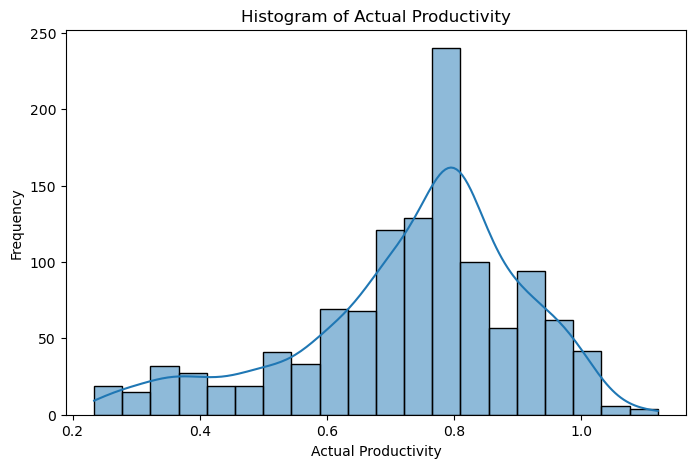

In [30]:
# Univariate Histogram
plt.figure(figsize=(8, 5))
sns.histplot(df['actual_productivity'], bins=20, kde=True)
plt.title('Histogram of Actual Productivity')
plt.xlabel('Actual Productivity')
plt.ylabel('Frequency')
plt.show()

In [31]:
# the actual productivity is normally distributed with mean around .8 and left skewed

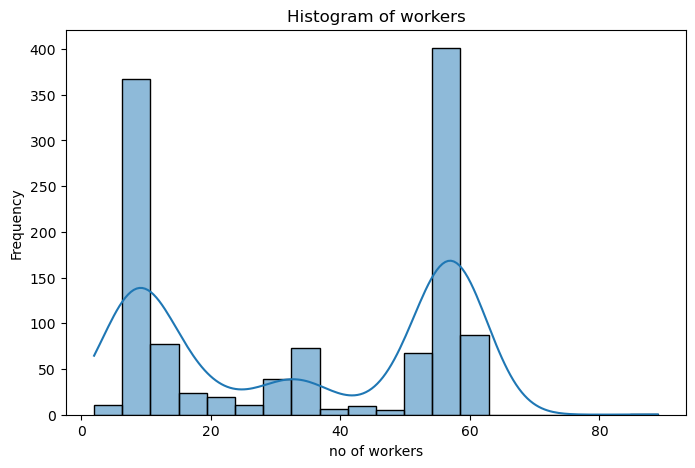

In [32]:
# Univariate Histogram
plt.figure(figsize=(8, 5))
sns.histplot(df['no_of_workers'], bins=20, kde=True)
plt.title('Histogram of workers')
plt.xlabel('no of workers')
plt.ylabel('Frequency')
plt.show()

In [33]:
# the distribution is bimodal with 2 peaks

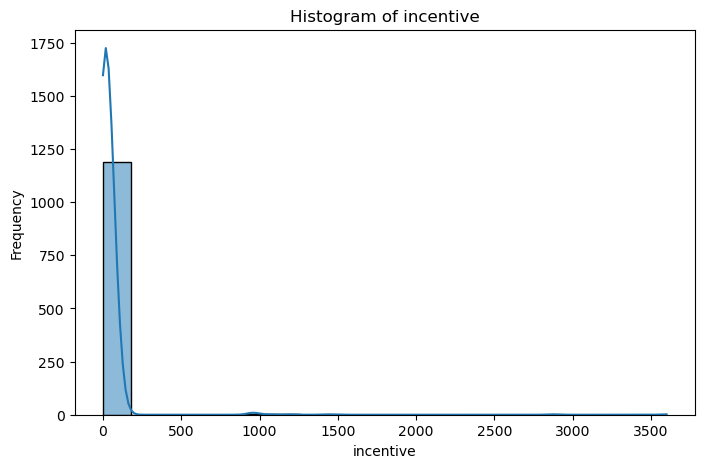

In [34]:
# Univariate Histogram
plt.figure(figsize=(8, 5))
sns.histplot(df['incentive'], bins=20, kde=True)
plt.title('Histogram of incentive')
plt.xlabel('incentive')
plt.ylabel('Frequency')
plt.show()

In [35]:
#there are a lot of outliers in incentive

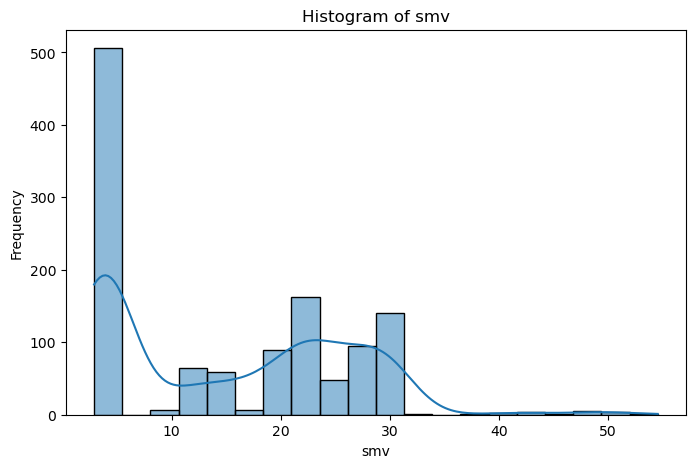

In [36]:
# Univariate Histogram
plt.figure(figsize=(8, 5))
sns.histplot(df['smv'], bins=20, kde=True)
plt.title('Histogram of smv')
plt.xlabel('smv')
plt.ylabel('Frequency')
plt.show()

In [37]:
# there may be outliers in upper end

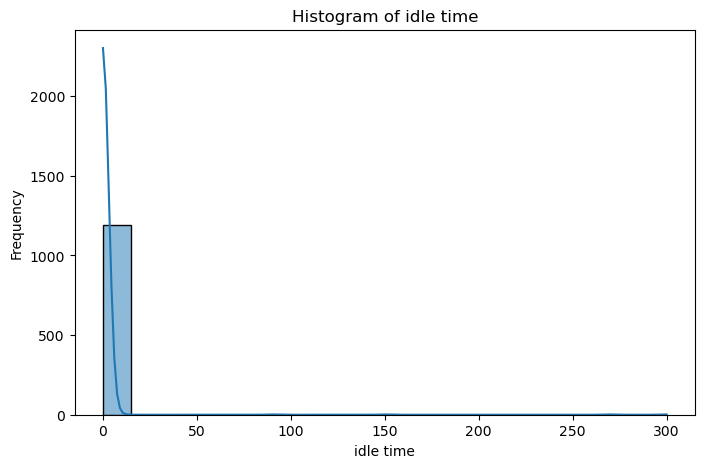

In [38]:
# Univariate Histogram
plt.figure(figsize=(8, 5))
sns.histplot(df['idle_time'], bins=20, kde=True)
plt.title('Histogram of idle time')
plt.xlabel('idle time')
plt.ylabel('Frequency')
plt.show()

In [39]:
# there may be outliers

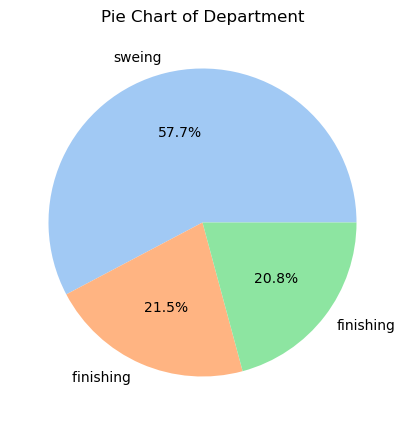

In [40]:
# Univariate Pie Chart
plt.figure(figsize=(8, 5))
df['department'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Pie Chart of Department')
plt.ylabel('')
plt.show()

In [41]:
#productivity is more in finishing dept
#both finishing department has to be merged

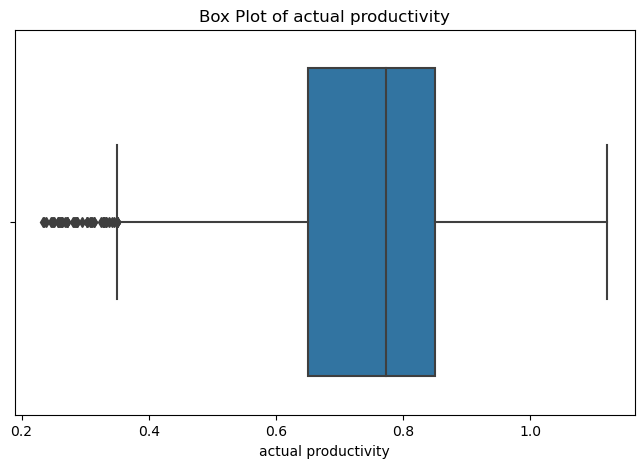

In [42]:
# Univariate Box Plot
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['actual_productivity'])
plt.title('Box Plot of actual productivity')
plt.xlabel('actual productivity')
plt.show()

In [43]:
# shows some outliers in actual productivity column

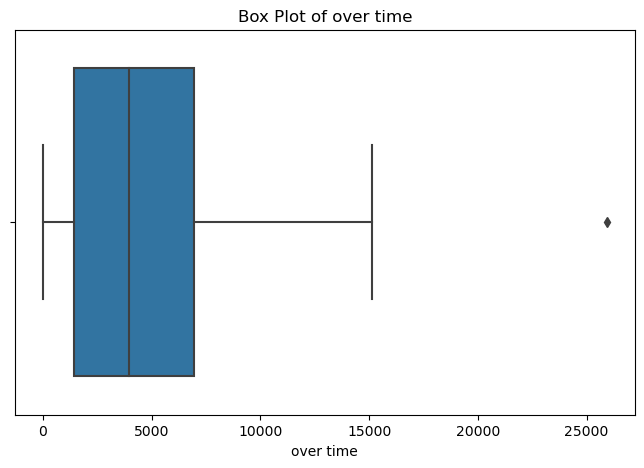

In [44]:

# Univariate Box Plot
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['over_time'])
plt.title('Box Plot of over time')
plt.xlabel('over time')
plt.show()

<Axes: xlabel='targeted_productivity', ylabel='actual_productivity'>

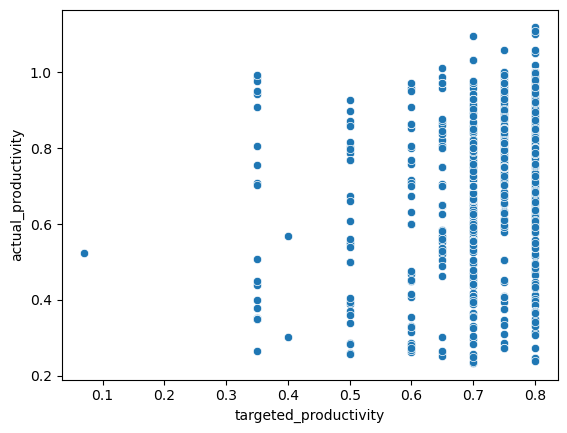

In [45]:
sns.scatterplot(x=df.targeted_productivity, y=df.actual_productivity)

<Axes: xlabel='incentive', ylabel='actual_productivity'>

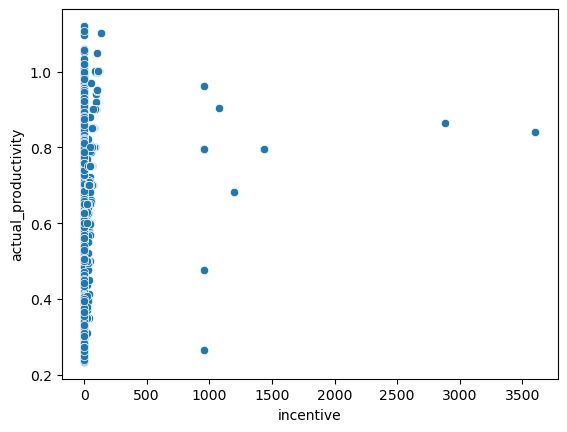

In [46]:
sns.scatterplot(x='incentive', y='actual_productivity', data=df)

<Axes: xlabel='over_time', ylabel='actual_productivity'>

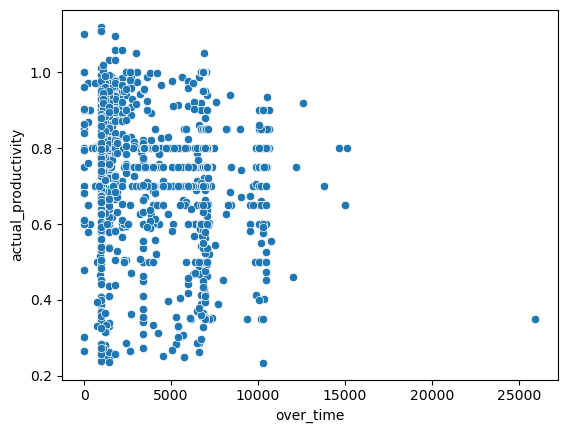

In [47]:
sns.scatterplot(x=df.over_time, y=df.actual_productivity)

In [48]:
# Step 5: Observations from data visualization
# - The date and wip columns has to be removed
# - Outliers require rows to be trimmed
# - actual_productivity seems to have a normal distribution with most values clustered around the mean.
# - Department is categorical with 3  values but 2 of them have to merged since only 2 distinct values are there


# Data Preprocessing

In [49]:
# Step 1: Remove ID columns - index and PatientID
df = df.drop(columns=['date', 'wip'])

In [50]:
df.shape

(1197, 13)

In [51]:
df.isnull().sum()

quarter                  0
department               0
day                      0
team                     0
targeted_productivity    0
smv                      0
over_time                0
incentive                0
idle_time                0
idle_men                 0
no_of_style_change       0
no_of_workers            0
actual_productivity      0
dtype: int64

In [52]:
# Step 2: replace finishing  with finishing
df.replace(to_replace="finishing ", value="finishing", inplace=True)

In [53]:
df.department

0          sweing
1       finishing
2          sweing
3          sweing
4          sweing
          ...    
1192    finishing
1193    finishing
1194    finishing
1195    finishing
1196    finishing
Name: department, Length: 1197, dtype: object

In [54]:
df.shape

(1197, 13)

In [55]:
# Step 3: Split numeric columns into X
df_num = df.select_dtypes(include='number')
df_num.head()


,team,targeted_productivity,smv,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,8,0.80,26.16,7080,98,0.0,0,0,59.0,0.940725
1,1,0.75,3.94,960,0,0.0,0,0,8.0,0.886500
2,11,0.80,11.41,3660,50,0.0,0,0,30.5,0.800570
3,12,0.80,11.41,3660,50,0.0,0,0,30.5,0.800570
4,6,0.80,25.90,1920,50,0.0,0,0,56.0,0.800382


In [56]:
# function to remove outlier
def outlier_remover(df_num,df):
    Q1 = df_num.quantile(0.25)
    Q3 = df_num.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[~((df_num < lower_bound) | (df_num > upper_bound)).any(axis=1)]
    return df


In [57]:
df = outlier_remover(df_num,df)

In [58]:
df.shape

(945, 13)

<Axes: xlabel='actual_productivity'>

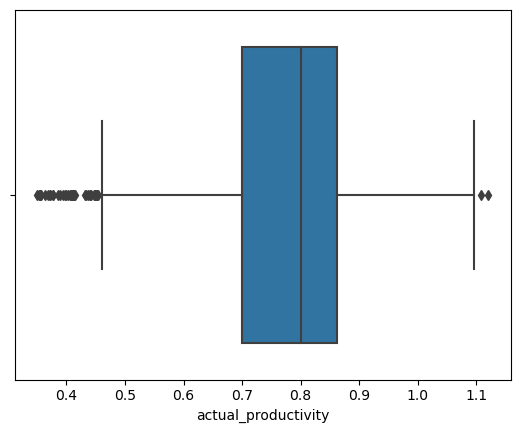

In [59]:
sns.boxplot(x=df['actual_productivity'])

In [60]:
df_num = df.select_dtypes(include='number')
df = outlier_remover(df_num,df)

<Axes: xlabel='actual_productivity'>

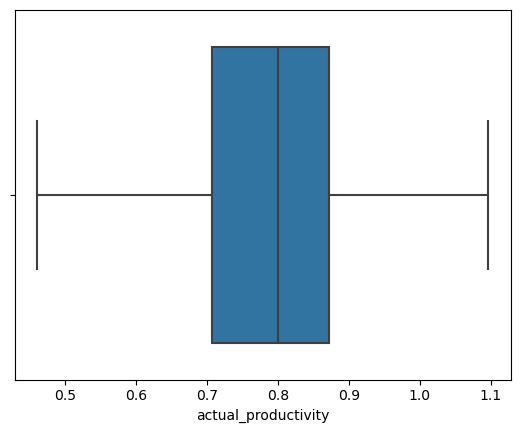

In [61]:
sns.boxplot(x=df['actual_productivity'])

In [62]:
df.shape

(898, 13)

In [63]:
X = df.drop('actual_productivity', axis=1)
y = df.actual_productivity
X.head()

,quarter,department,day,team,targeted_productivity,smv,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers
0,Quarter1,sweing,Thursday,8,0.80,26.16,7080,98,0.0,0,0,59.0
1,Quarter1,finishing,Thursday,1,0.75,3.94,960,0,0.0,0,0,8.0
2,Quarter1,sweing,Thursday,11,0.80,11.41,3660,50,0.0,0,0,30.5
3,Quarter1,sweing,Thursday,12,0.80,11.41,3660,50,0.0,0,0,30.5
4,Quarter1,sweing,Thursday,6,0.80,25.90,1920,50,0.0,0,0,56.0


In [64]:
X_num = X.select_dtypes('number')
X_num.head()

,team,targeted_productivity,smv,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers
0,8,0.80,26.16,7080,98,0.0,0,0,59.0
1,1,0.75,3.94,960,0,0.0,0,0,8.0
2,11,0.80,11.41,3660,50,0.0,0,0,30.5
3,12,0.80,11.41,3660,50,0.0,0,0,30.5
4,6,0.80,25.90,1920,50,0.0,0,0,56.0


In [65]:
X_cat = X.select_dtypes('object')
X_cat.head()

,quarter,department,day
0,Quarter1,sweing,Thursday
1,Quarter1,finishing,Thursday
2,Quarter1,sweing,Thursday
3,Quarter1,sweing,Thursday
4,Quarter1,sweing,Thursday


In [66]:
# Step 4: Rescale numeric columns (optional, based on the algorithm used)
scaler = MinMaxScaler()
X_num_scaled = scaler.fit_transform(X_num)

In [67]:
# Convert the scaled numpy array back to a DataFrame
X_num_scaled = pd.DataFrame(X_num_scaled, columns=X_num.columns, index=X_num.index)

In [68]:
X_num_scaled.describe()

,team,targeted_productivity,smv,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers
count,898.000000,898.000000,898.000000,898.000000,898.000000,898.0,898.0,898.0,898.000000
mean,0.495343,0.790646,0.236080,0.303949,0.242219,0.0,0.0,0.0,0.351132
std,0.326949,0.273334,0.222288,0.226984,0.272072,0.0,0.0,0.0,0.253041
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000
25%,0.181818,0.500000,0.022638,0.095238,0.000000,0.0,0.0,0.0,0.080460
50%,0.454545,1.000000,0.189595,0.261905,0.193277,0.0,0.0,0.0,0.344828
75%,0.818182,1.000000,0.427079,0.460317,0.420168,0.0,0.0,0.0,0.632184
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,1.000000


In [69]:
# Step 5: One-hot encode category columns
X_cat_encoded = pd.get_dummies(X_cat, drop_first=False, dtype=int)  # Drop_first to avoid multicollinearity

In [70]:
# Step 6: Merge df_num and df_cat_encoded into X
X = pd.concat([X_num_scaled, X_cat_encoded], axis=1)

In [71]:
 X.shape, X_num_scaled.shape, X_cat_encoded.shape

((898, 22), (898, 9), (898, 13))

In [72]:
# Step 7: Check for NA in X and y; Check for shape compatibility
print("\nStep 7: Checking for NAs and Shape Compatibility")
print(X.isnull().sum())
print(y.isnull().sum())
print(X.shape)
print(y.shape)


Step 7: Checking for NAs and Shape Compatibility
team                     0
targeted_productivity    0
smv                      0
over_time                0
incentive                0
idle_time                0
idle_men                 0
no_of_style_change       0
no_of_workers            0
quarter_Quarter1         0
quarter_Quarter2         0
quarter_Quarter3         0
quarter_Quarter4         0
quarter_Quarter5         0
department_finishing     0
department_sweing        0
day_Monday               0
day_Saturday             0
day_Sunday               0
day_Thursday             0
day_Tuesday              0
day_Wednesday            0
dtype: int64
0
(898, 22)
(898,)


In [73]:
X.describe()

,team,targeted_productivity,smv,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,quarter_Quarter1,...,quarter_Quarter4,quarter_Quarter5,department_finishing,department_sweing,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday
count,898.000000,898.000000,898.000000,898.000000,898.000000,898.0,898.0,898.0,898.000000,898.000000,...,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000
mean,0.495343,0.790646,0.236080,0.303949,0.242219,0.0,0.0,0.0,0.351132,0.353007,...,0.170379,0.043430,0.461024,0.538976,0.160356,0.162584,0.171492,0.164811,0.172606,0.168151
std,0.326949,0.273334,0.222288,0.226984,0.272072,0.0,0.0,0.0,0.253041,0.478171,...,0.376175,0.203936,0.498756,0.498756,0.367141,0.369191,0.377149,0.371216,0.378117,0.374209
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.181818,0.500000,0.022638,0.095238,0.000000,0.0,0.0,0.0,0.080460,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.454545,1.000000,0.189595,0.261905,0.193277,0.0,0.0,0.0,0.344828,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.818182,1.000000,0.427079,0.460317,0.420168,0.0,0.0,0.0,0.632184,1.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [74]:
# Step 8: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [75]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape) 
print(y_test.shape)

(718, 22)
(180, 22)
(718,)
(180,)


## Decision Tree Regressor

In [92]:
def find_mape(y,y_pred):
    return (np.mean(np.abs((y - y_pred) / y)))

In [109]:
dt_regressor = DecisionTreeRegressor()
param_grid = {
    'max_depth': [None, 5, 10, 15],
    #'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [2, 4, 6, 8, 10]
    #'max_features': ['auto', 'sqrt', 'log2']
}
grid_search = GridSearchCV(estimator=dt_regressor, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [110]:
best_params

{'max_depth': 10, 'min_samples_leaf': 10}

In [97]:
depths_to_try = [3, 5, 7, 9, 11,13,15,17,19]  # List of depths to try
#best_depth = None
#best_mape = float('inf')
df_best=pd.DataFrame(columns=['depth','mape'])

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

for depth in depths_to_try:
    # Create and train the Decision Tree Regressor
    model = DecisionTreeRegressor(max_depth=depth, random_state=42)
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Calculate MAPE
    mape = find_mape(y_test, y_pred)
    
    #df_best.loc[len(df_best)].append({'depth':depth,'mape':mape})
    df_best=df_best.append({'depth':depth,'mape':mape},ignore_index=True)
    # Update best_depth and best_mape if necessary
#     if mape < best_mape:
#         best_depth = depth
#         best_mape = mape

# print(f"Best Depth: {best_depth}")
# print(f"Best MAPE: {best_mape}")


C:\Users\admin\AppData\Local\Temp\ipykernel_18656\2936648184.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_best=df_best.append({'depth':depth,'mape':mape},ignore_index=True)
C:\Users\admin\AppData\Local\Temp\ipykernel_18656\2936648184.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_best=df_best.append({'depth':depth,'mape':mape},ignore_index=True)
C:\Users\admin\AppData\Local\Temp\ipykernel_18656\2936648184.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_best=df_best.append({'depth':depth,'mape':mape},ignore_index=True)
C:\Users\admin\AppData\Local\Temp\ipykernel_18656\2936648184.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pan

In [98]:
df_best

,depth,mape
0,3.0,0.092188
1,5.0,0.076201
2,7.0,0.073734
3,9.0,0.070734
4,11.0,0.074869
5,13.0,0.079751
6,15.0,0.075502
7,17.0,0.078725
8,19.0,0.074255


In [111]:
dtr=DecisionTreeRegressor(max_depth=10,min_samples_leaf=10)
model=dtr.fit(X_train,y_train)

[Text(0.5571022727272728, 0.9545454545454546, 'incentive <= 0.71\nsquared_error = 0.015\nsamples = 718\nvalue = 0.793'),
 Text(0.3619318181818182, 0.8636363636363636, 'targeted_productivity <= 0.625\nsquared_error = 0.014\nsamples = 672\nvalue = 0.783'),
 Text(0.18409090909090908, 0.7727272727272727, 'over_time <= 0.21\nsquared_error = 0.017\nsamples = 187\nvalue = 0.726'),
 Text(0.09090909090909091, 0.6818181818181818, 'no_of_workers <= 0.086\nsquared_error = 0.024\nsamples = 80\nvalue = 0.781'),
 Text(0.05454545454545454, 0.5909090909090909, 'day_Wednesday <= 0.5\nsquared_error = 0.025\nsamples = 50\nvalue = 0.736'),
 Text(0.03636363636363636, 0.5, 'smv <= 0.022\nsquared_error = 0.024\nsamples = 38\nvalue = 0.767'),
 Text(0.01818181818181818, 0.4090909090909091, 'squared_error = 0.028\nsamples = 11\nvalue = 0.681'),
 Text(0.05454545454545454, 0.4090909090909091, 'team <= 0.455\nsquared_error = 0.018\nsamples = 27\nvalue = 0.802'),
 Text(0.03636363636363636, 0.3181818181818182, 'squar

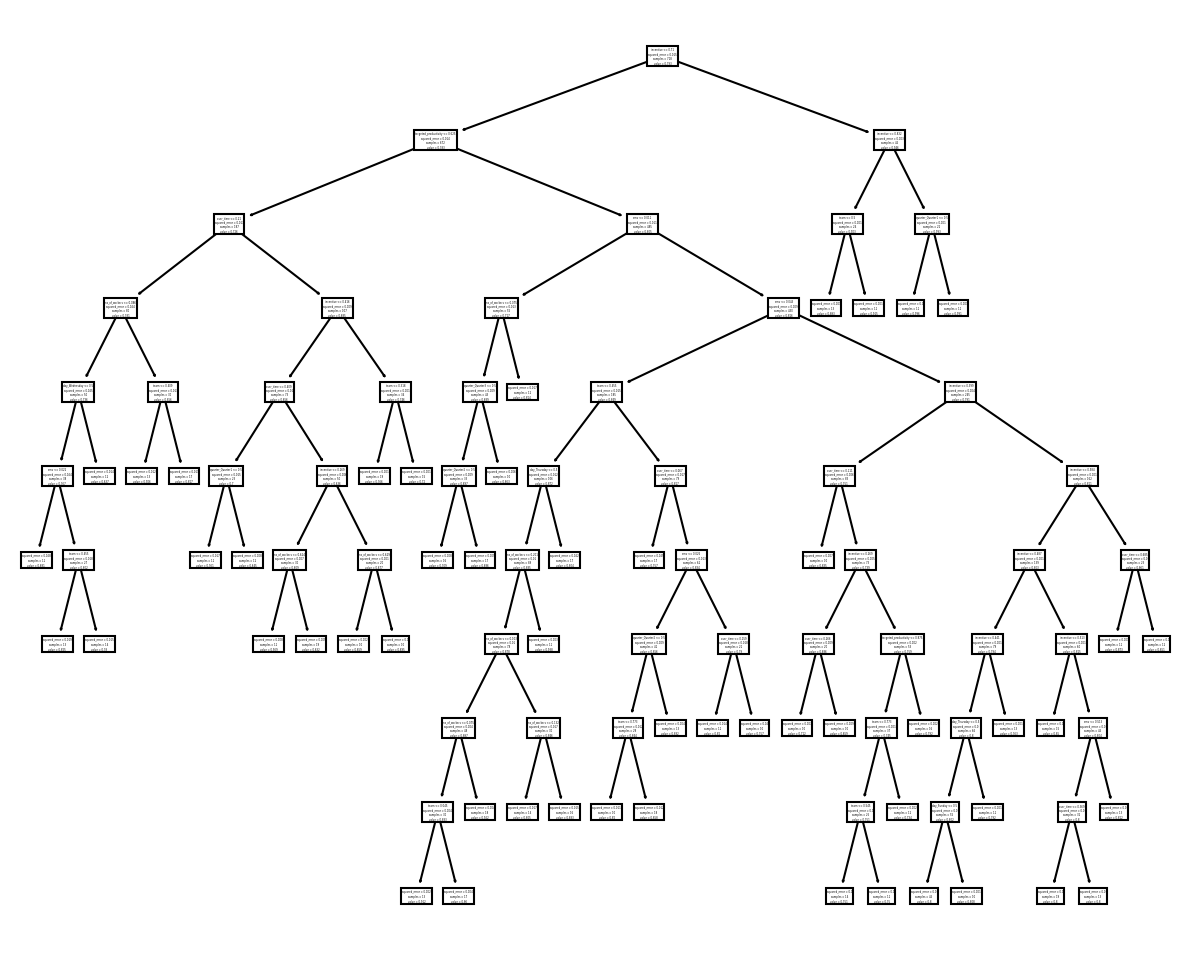

In [112]:
feature_names =X_train.columns
plt.figure(figsize=(10,8), dpi=150)
plot_tree(model,feature_names=feature_names)

In [113]:
y_pred=model.predict(X_test)

In [114]:
mean_squared_error(y_test,y_pred)

0.006418651660495225

In [108]:
feature_df = pd.DataFrame({'features':model.feature_names_in_, 'importance':model.feature_importances_})
feature_df.sort_values(by='importance', ascending=False)

,features,importance
4,incentive,0.259790
2,smv,0.179442
3,over_time,0.135387
1,targeted_productivity,0.119427
8,no_of_workers,0.105377
0,team,0.036779
13,quarter_Quarter5,0.027863
21,day_Wednesday,0.027225
11,quarter_Quarter3,0.025646
15,department_sweing,0.024570


#### As per the feature importance values from the decision tree regressor, productivity is mostly impacted by:
#### Incentive, and smv (Standard Minute Value, it is the allocated time for a task)

##### It can be concluded that providing incentives have direct impact on productivity